# Cab Services EDA Analayis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Library Imports

- **NumPy (`np`)**: Used for numerical operations and array handling.
- **Pandas (`pd`)**: Provides powerful tools for data manipulation and analysis using DataFrames.
- **Matplotlib (`plt`)**: A basic plotting library for creating visualizations such as line plots, bar charts, and histograms.
- **Seaborn (`sns`)**: A high-level visualization library built on Matplotlib, used for creating informative and attractive statistical graphics.


####  Loading the Cab Data

In [6]:
cab = pd.read_csv('Datasets\Cab_Data.csv')
cab.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


- `pd.read_csv('Datasets\Cab_Data.csv')`: Loads the `Cab_Data.csv` file from the specified folder using Pandas.
- The resulting DataFrame is stored in the variable `cab`.
- `cab.head()` displays the first 5 rows to preview the structure and values of the dataset.

#### Loading the City Data

In [7]:
city = pd.read_csv("Datasets\City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


- `pd.read_csv("Datasets\City.csv")`: Reads the `City.csv` file containing population and user data for different cities.
- The data is stored in the variable `city`.
- `city.head()` shows the first 5 rows to preview the structure and content of the dataset.

#### Loading the Customer Data

In [8]:
customer = pd.read_csv("Datasets\Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


- `pd.read_csv("Datasets\Customer_ID.csv")`: Loads the customer demographic data from the `Customer_ID.csv` file.
- The DataFrame is stored in the variable `customer`.
- `customer.head()` displays the first 5 rows to preview customer details like age, income, and gender.

#### Loading the Transaction Data

In [10]:
transaction = pd.read_csv("Datasets\Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card




- `pd.read_csv("Datasets\Transaction_ID.csv")`: Reads the `Transaction_ID.csv` file containing mappings between transactions and customer IDs, along with payment modes.
- The data is stored in the variable `transaction`.
- `transaction.head()` previews the first 5 rows to inspect transaction-to-customer links and payment details.


In [11]:
print("Shape of Cab Dataset:",cab.shape)
print("Shape of City Dataset:",city.shape)
print("Shape of Customer Dataset:",customer.shape)
print("Shape of Transactions Dataset:",transaction.shape)

Shape of Cab Dataset: (359392, 7)
Shape of City Dataset: (20, 3)
Shape of Customer Dataset: (49171, 4)
Shape of Transactions Dataset: (440098, 3)


- **Cab Dataset:** `(359,392, 7)` → Contains 359,392 cab trip records with 7 features like distance, fare, cost, etc.
- **City Dataset:** `(20, 3)` → Covers 20 unique cities with population and number of cab users.
- **Customer Dataset:** `(49,171, 4)` → Includes demographic details (e.g., age, income, gender) for 49,171 customers.
- **Transactions Dataset:** `(440,098, 3)` → Holds transaction-level data mapping trips to customers and payment modes.

This overview helps verify dataset sizes and potential join relationships.

In [12]:
cab_df=cab.copy()
city_df=city.copy()
customer_df=customer.copy()
transaction_df= transaction.copy()

- `cab_df = cab.copy()`: Creates a separate copy of the cab dataset for processing and analysis.
- `city_df = city.copy()`: Copies the city dataset to avoid modifying the original.
- `customer_df = customer.copy()`: Duplicates the customer data for safe manipulation.
- `transaction_df = transaction.copy()`: Copies the transaction data for further merging and cleaning.

Creating copies ensures that the original datasets remain unchanged during transformations.

### __Analysis of Cab Data__

In [14]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


- The `Date of Travel` column in `cab_df` is stored as an Excel serial number (number of days since 1899-12-30).
- `pd.to_datetime('1899-12-30') + pd.to_timedelta(..., unit='D')` converts it into a proper datetime format.
- This allows for accurate time-based analysis such as monthly trends, weekday patterns, and seasonal behavior.








In [21]:
# Convert Excel serial number to datetime
cab_df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_df['Date of Travel'], unit='D')


In [23]:
cab_df['Date of Travel'].head()

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]

__Descriptive Analysis__

In [16]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


- **KM Travelled:** Ranges from 1.9 to 48 km, with a median of ~22.4 km — most trips are short to medium distance.
- **Price Charged:** Mean is ~$423, but the max value exceeds $2,000, indicating potential outliers or high-value rides.
- **Cost of Trip:** Median cost is ~$282, with a similar range and skew as price.
- **Date of Travel:** Stored as serial numbers, ranging from ~Jan 2016 to Dec 2018 (converted earlier).
- This statistical overview helps identify distribution patterns, skewness, and potential anomalies in the dataset.











In [17]:
cab_df.describe(include=['O'])

,Company,City
count,359392,359392
unique,2,19
top,Yellow Cab,NEW YORK NY
freq,274681,99885


In [19]:
cab_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [20]:
cab_df.City.value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

- **NEW YORK NY** has the highest number of rides (99,885), followed by **CHICAGO IL** (56,625) and **LOS ANGELES CA** (48,033).
- Cities like **PITTSBURGH PA**, **TUCSON AZ**, and **PHOENIX AZ** have relatively low ride volumes.
- This distribution highlights major urban centers as key markets for cab services and suggests potential under-penetration or lower demand in smaller cities.
- Useful for identifying high-performing cities and exploring expansion or marketing opportunities in underrepresented areas.

In [30]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Trip Type         0
dtype: int64

__No Null Values__

In [32]:
cab_df.duplicated().sum()

0

__No Duplicates found__

In [39]:
print("Total Records:",cab_df.shape[0])
print("No of unique transaction_ids:",len(cab_df['Transaction ID'].unique()))

Total Records: 359392
No of unique transaction_ids: 359392


This confirms that each row in the dataset represents a unique cab ride. There are no duplicate transactions, ensuring data integrity for further analysis.







__Data Distribution Analysis__

*Transaction ID can be ignored*

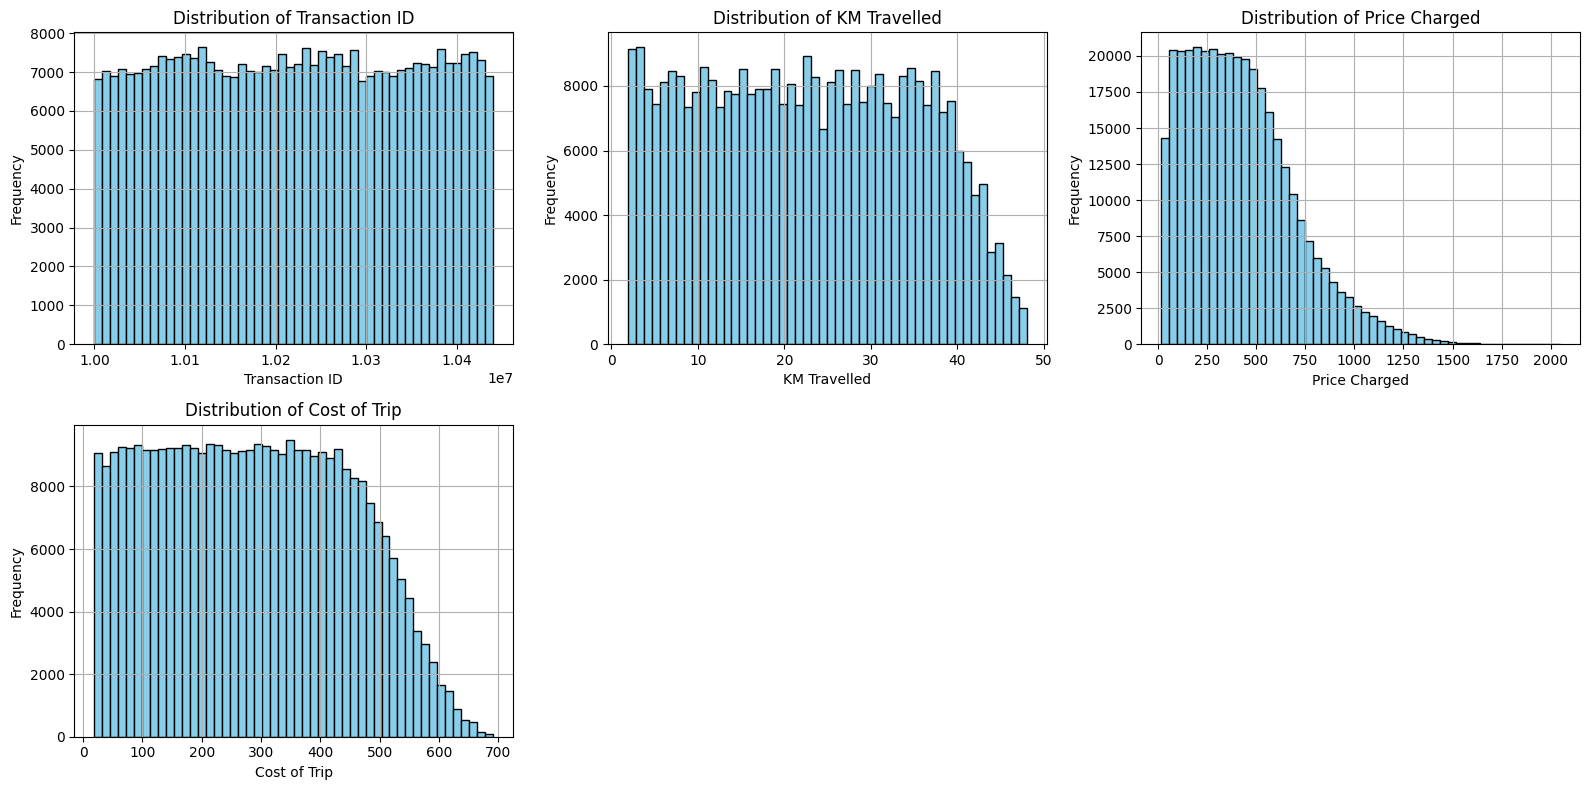

In [33]:
numeric_cols = cab_df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplot grid
num_cols = len(numeric_cols)
cols = 3
rows = (num_cols + cols - 1) // cols  # Ceiling division

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(cab_df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

- **Transaction ID:** Uniformly distributed, confirming a random or sequential assignment with no missing chunks.
- **KM Travelled:** Fairly uniform up to ~35 km, with a slight drop-off beyond that. Most trips fall between 10–40 km.
- **Price Charged:** Right-skewed distribution — majority of rides are priced under $800, with a long tail of high-value rides reaching over $2,000.
- **Cost of Trip:** Also right-skewed but slightly more compressed than Price Charged. Most costs fall under $500, with a steep decline after that.

These plots highlight normal operational ranges and help in spotting potential outliers or edge cases for further analysis.

__Outlier detection__


In [24]:
Q1 = cab_df['Price Charged'].quantile(0.25)
Q3 = cab_df['Price Charged'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Outlier filter
outliers_price = cab_df[cab_df['Price Charged'] > upper_bound]
print(f"Price Charged Outliers: {len(outliers_price)}")

Price Charged Outliers: 5958


- The Interquartile Range (IQR) method was used to detect outliers in the `Price Charged` column.
- Any value greater than `Q3 + 1.5 * IQR` is considered an outlier.
- **Outliers Found:** 5,958 rides have unusually high prices compared to the rest of the dataset.

This helps isolate extreme fare values that may indicate premium services, long-distance trips, or data anomalies.

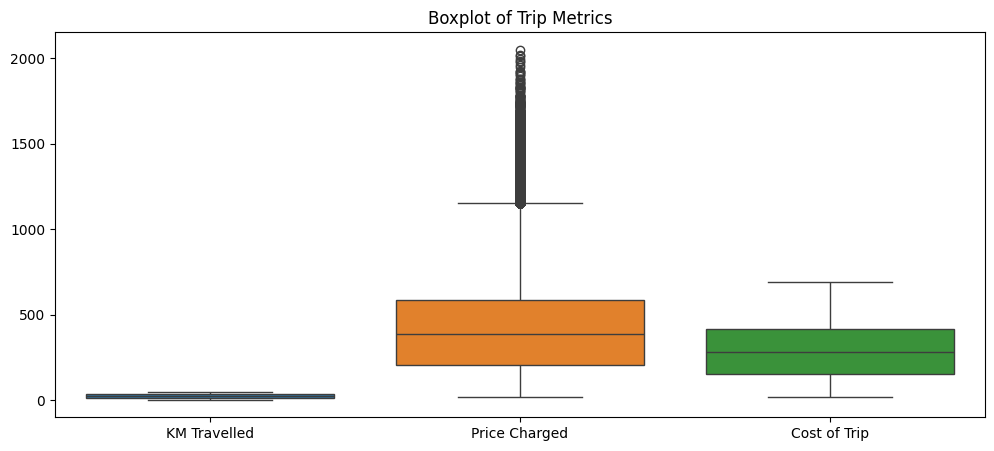

In [25]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=cab_df[['KM Travelled', 'Price Charged', 'Cost of Trip']])
plt.title("Boxplot of Trip Metrics")
plt.show()

<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

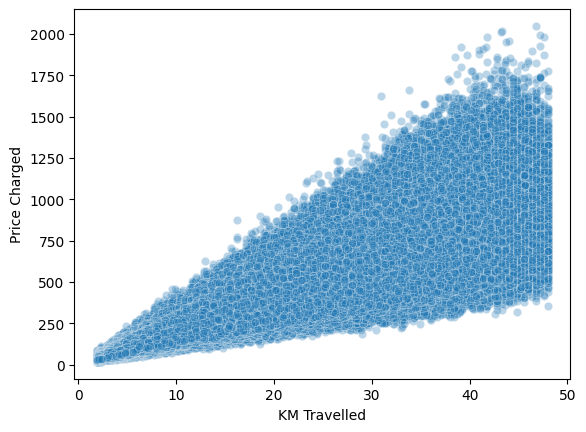

In [26]:
sns.scatterplot(data=cab_df, x='KM Travelled', y='Price Charged', alpha=0.3)

 The plot shows a strong positive relationship between distance (`KM Travelled`) and fare (`Price Charged`).
- As the distance increases, the price generally increases — indicating consistent fare calculation logic.
- A few points lie significantly above the main trend line, representing **high-price outliers**, likely due to premium services or long-distance surcharges.
- Overall, the plot validates the pricing model and confirms that most high-price rides are backed by longer travel distances.

In [27]:
cab_df['Trip Type'] = np.where(cab_df['Price Charged'] > upper_bound, 'High Value', 'Typical')

In [28]:
cab_df['Trip Type'].value_counts()

Trip Type
Typical       353434
High Value      5958
Name: count, dtype: int64

 A new column `Trip Type` was created to categorize rides based on fare amount.
- Trips with `Price Charged` above the outlier threshold (`Q3 + 1.5 * IQR`) are labeled as **"High Value"**.
- All other trips are labeled as **"Typical"**.
- This segmentation helps in comparing ride patterns, customer profiles, and profitability between standard and premium segments.

In [34]:
cab_df['Month'] = cab_df['Date of Travel'].dt.month
cab_df['Year'] = cab_df['Date of Travel'].dt.year
cab_df['Weekday'] = cab_df['Date of Travel'].dt.day_name()
cab_df['Profit'] = cab_df['Price Charged'] - cab_df['Cost of Trip']
cab_df['Margin %'] = (cab_df['Profit'] / cab_df['Price Charged']) * 100

In [35]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Trip Type', 'Month', 'Year',
       'Weekday', 'Profit', 'Margin %'],
      dtype='object')

----
#### __Analysing City data__

In [40]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [41]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [42]:
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

 The `Population` and `Users` columns in `city_df` were originally stored as strings due to comma formatting (e.g., "1,000,000").
- `str.replace(',', '')` removes commas, and `.astype(int)` converts the cleaned strings to integers.
- This transformation is necessary to perform numerical operations like calculating penetration rates and aggregations.

In [43]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [45]:
city_df.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


__Summary Statistics__

In [51]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


- **Population:** Ranges from ~249,000 to over 8.4 million, with an average around 1.23 million. This indicates a mix of large metros and mid-sized cities.
- **Users:** Number of cab users ranges from 3,643 to 302,149, with a mean of ~64,521.
- The wide standard deviations for both columns suggest high variability across cities, likely driven by city size and cab adoption rate.
- These statistics provide context for comparing ride volume and user penetration across different urban markets.




In [53]:
city_df.City.value_counts()

City
NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: count, dtype: int64

In [54]:
set(cab_df['City'].unique()) - set(city_df['City'].unique())

set()

- Compared the unique city names in `cab_df` and `city_df` using set operations.
- The result is an empty set: `set()`
- This confirms that all cities listed in the cab data are present in the city dataset, ensuring a smooth and complete merge without mismatches.

In [55]:
cab_df = cab_df.merge(city_df, on='City', how='left')

- Merged `cab_df` with `city_df` using the common column `City`.
- A **left join** ensures that all cab trip records are retained, and city-level information (`Population`, `Users`) is added where available.
- This enrichment enables city-based analysis such as ride density, user penetration, and market potential.

In [56]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Trip Type', 'Month', 'Year',
       'Weekday', 'Profit', 'Margin %', 'Population', 'Users'],
      dtype='object')

In [57]:
cab_df['User Penetration %'] = (cab_df['Users'] / cab_df['Population']) * 100

 `User Penetration %` is calculated as the percentage of cab users relative to the total city population.

----
#### __Analysing Customer Data__

In [58]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [59]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [60]:
customer_df['Gender'].value_counts()

Gender
Male      26562
Female    22609
Name: count, dtype: int64

__Summary Statistics__

In [61]:
customer_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


- **Age:** Ranges from 18 to 65, with a median age of 33 and a mean of ~35 — indicating a predominantly working-age customer base.
- **Income (USD/Month):** Varies from $2,000 to $35,000, with a median of ~$14,656. The high standard deviation (~$8,000) suggests a wide income spread.

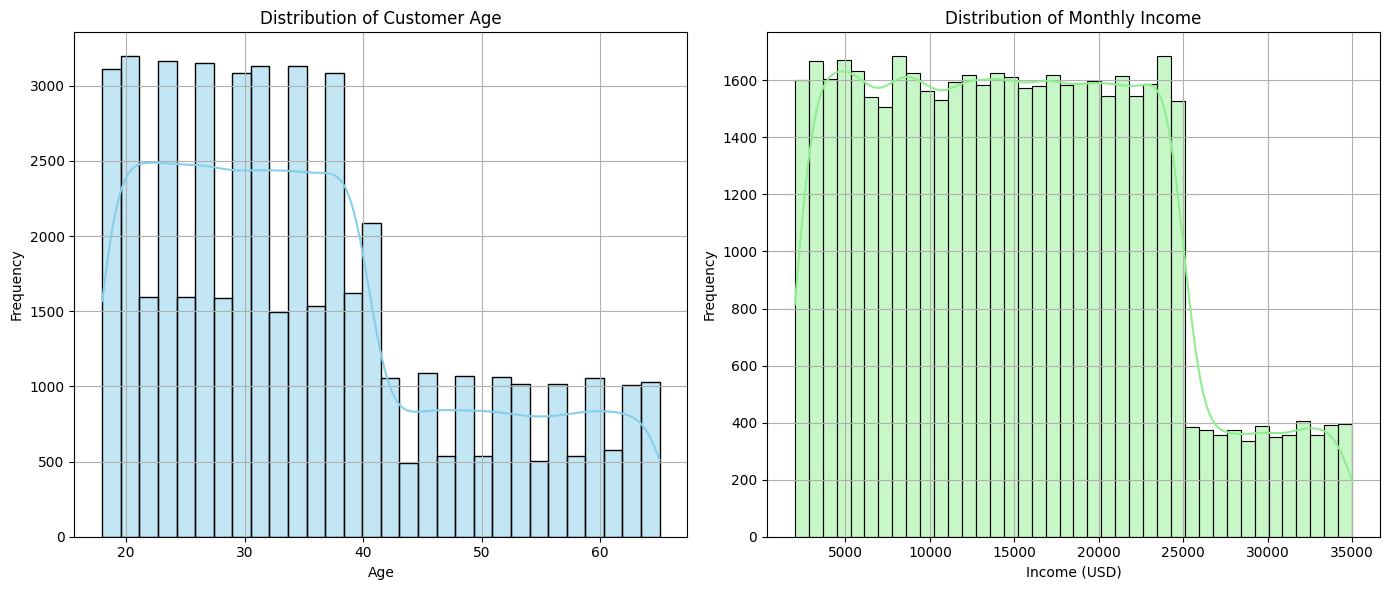

In [69]:
plt.figure(figsize=(14, 6))

# Plot Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(customer_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Plot Income Distribution
plt.subplot(1, 2, 2)
sns.histplot(customer_df['Income (USD/Month)'], bins=40, kde=True, color='lightgreen')
plt.title('Distribution of Monthly Income')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

- **Age Distribution:** Most customers are between 20 and 40 years old, with a noticeable decline after age 40. This suggests the majority of users are young to middle-aged adults.
- **Income Distribution:** Income is fairly evenly distributed up to $25,000, with a sharp drop beyond that. This indicates a potential segmentation point, separating standard users from high-income or premium users.

These distributions help identify the core customer demographic and guide segmentation strategies for pricing, marketing, or service offerings.




In [62]:
def income_segment(income):
    if income < 8000:
        return 'Low Income'
    elif income <= 20000:
        return 'Middle Income'
    else:
        return 'High Income'

customer_df['Income Segment'] = customer_df['Income (USD/Month)'].apply(income_segment)

- A function `income_segment()` was defined to classify customers based on their monthly income.
- Customers are grouped into:
  - **Low Income**: less than $8,000/month  
  - **Middle Income**: between $8,000 and $20,000/month  
  - **High Income**: above $20,000/month
- The result is stored in a new column `Income Segment` in `customer_df`.

In [64]:
customer_df.head(10)

,Customer ID,Gender,Age,Income (USD/Month),Income Segment
0,29290,Male,28,10813,Middle Income
1,27703,Male,27,9237,Middle Income
2,28712,Male,53,11242,Middle Income
3,28020,Male,23,23327,High Income
4,27182,Male,33,8536,Middle Income
5,27318,Male,25,13984,Middle Income
6,33788,Male,23,23788,High Income
7,34106,Male,19,19980,Middle Income
8,59799,Male,33,19271,Middle Income
9,57982,Male,57,5068,Low Income


In [66]:
customer_df['Customer ID'].duplicated().sum()

0

In [67]:
customer_df.duplicated().sum()

0

__No Duplicates__

In [68]:
customer_df.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Income Segment        0
dtype: int64

__No Null Values__

----
#### __Analysing Transactions Data__

In [70]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [71]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [72]:
transaction_df['Payment_Mode'].value_counts()

Payment_Mode
Card    263991
Cash    176107
Name: count, dtype: int64

In [73]:
cab_df = cab_df.merge(transaction_df, on='Transaction ID', how='inner')

In [74]:
cab_df = cab_df.merge(customer_df, on='Customer ID', how='inner')

- The first merge joins `cab_df` with `transaction_df` using `Transaction ID`, adding `Customer ID` and `Payment_Mode` to each ride.
- The second merge joins the result with `customer_df` using `Customer ID`, enriching the dataset with demographic details like age, income, gender, and income segment.
- These joins create a complete, customer-level cab dataset, enabling in-depth analysis of ride behavior, demographics, and payment preferences.

In [75]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Trip Type', 'Month', 'Year',
       'Weekday', 'Profit', 'Margin %', 'Population', 'Users',
       'User Penetration %', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Income Segment'],
      dtype='object')

In [76]:
cab_df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Trip Type             0
Month                 0
Year                  0
Weekday               0
Profit                0
Margin %              0
Population            0
Users                 0
User Penetration %    0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Income Segment        0
dtype: int64

In [77]:
cab_df.duplicated().sum()

0

----

# Hypothesis

__H1 :  The number of cab rides increases during certain months of the year (e.g., holidays or summer months).__

In [79]:
seasonal_usage = cab_df.groupby(['Year', 'Month'])['Transaction ID'].count().reset_index()
seasonal_usage.rename(columns={'Transaction ID': 'Total Rides'}, inplace=True)


In [80]:
pivot_monthly = seasonal_usage.pivot(index='Month', columns='Year', values='Total Rides')

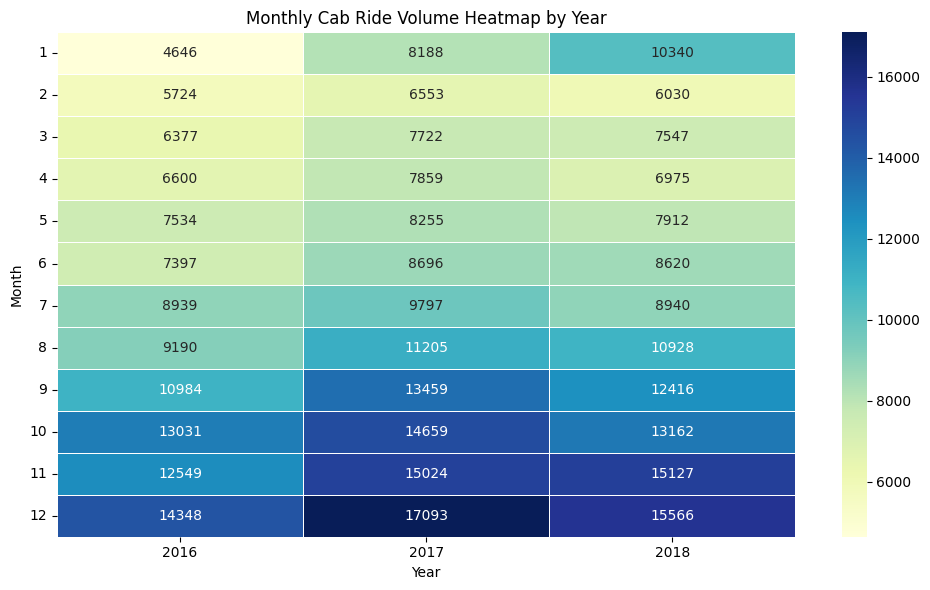

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_monthly, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5)

plt.title('Monthly Cab Ride Volume Heatmap by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

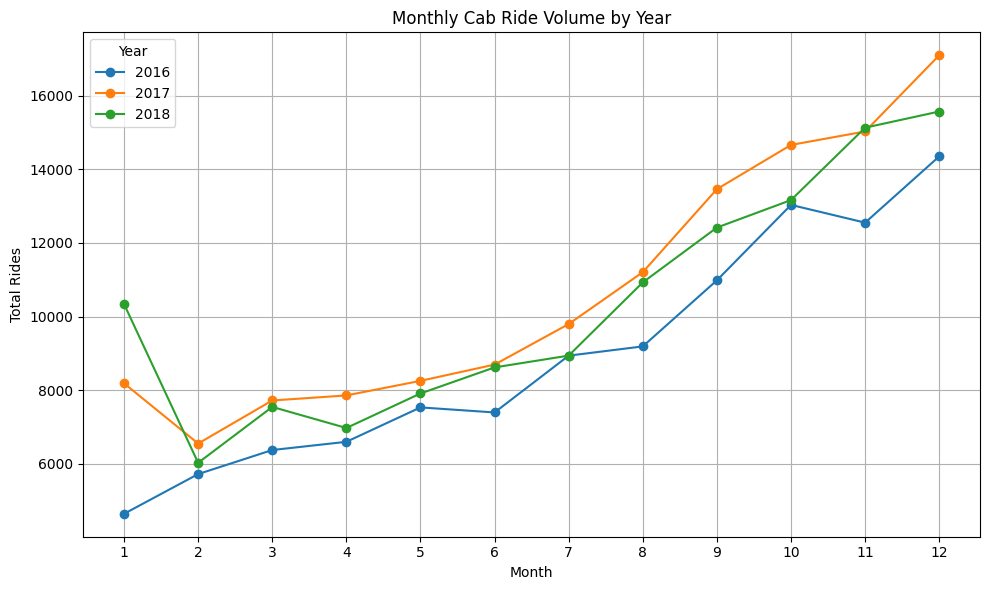

In [81]:
plt.figure(figsize=(10, 6))
for year in pivot_monthly.columns:
    plt.plot(pivot_monthly.index, pivot_monthly[year], marker='o', label=year)

plt.title('Monthly Cab Ride Volume by Year')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


**Findings:**

- The **heatmap** and **line plot** reveal a clear seasonal trend in ride volume.
- Cab usage rises steadily from **mid-year**, with a sharp **peak in December** for all years (2016–2018).
- **Highest activity** occurs between **September and December**, likely driven by:
  - Holiday travel (e.g., Thanksgiving, Christmas).
  - Year-end events and increased shopping.
- **Lowest activity** is observed in **January and February**, possibly due to post-holiday slowdown.

**Conclusion:**  
The data strongly supports the hypothesis. There is a consistent pattern of **increased cab usage in the latter part of the year**, indicating clear seasonality in demand.

----

__H2: One company (e.g., Pink Cab or Yellow Cab) consistently generates higher profit margins.__

In [86]:
company_performance = cab_df.groupby('Company')[['Profit', 'Margin %']].mean().reset_index()
company_performance = company_performance.sort_values(by='Profit', ascending=False)

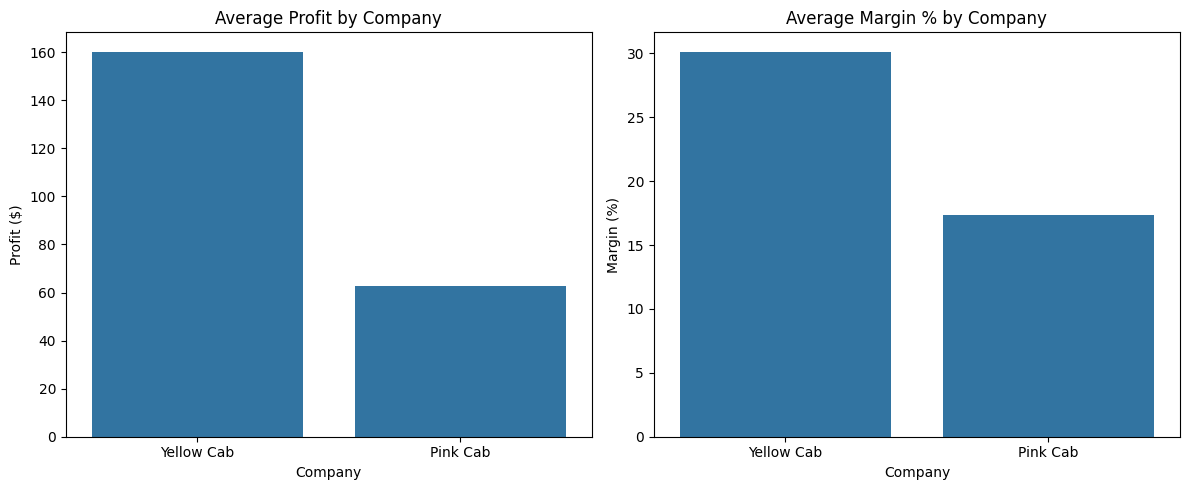

In [87]:
plt.figure(figsize=(12, 5))

# Average Profit
plt.subplot(1, 2, 1)
sns.barplot(data=company_performance, x='Company', y='Profit')
plt.title('Average Profit by Company')
plt.ylabel('Profit ($)')
plt.xlabel('Company')

# Average Margin %
plt.subplot(1, 2, 2)
sns.barplot(data=company_performance, x='Company', y='Margin %')
plt.title('Average Margin % by Company')
plt.ylabel('Margin (%)')
plt.xlabel('Company')

plt.tight_layout()
plt.show()

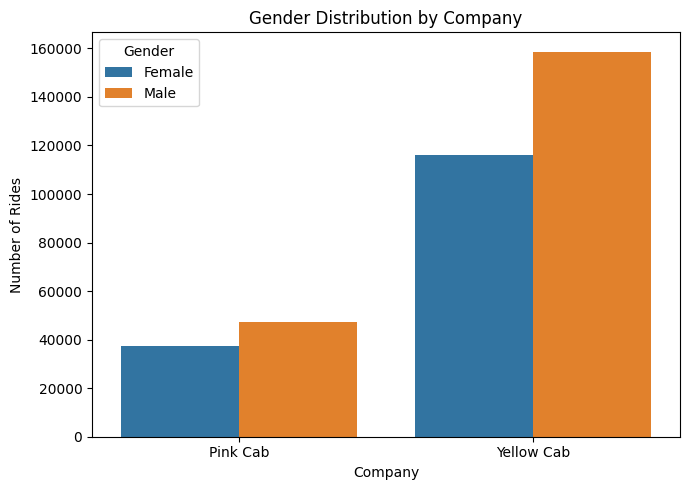

In [94]:
gender_distribution = cab_df.groupby(['Company', 'Gender'])['Transaction ID'].count().reset_index()
gender_distribution.rename(columns={'Transaction ID': 'Ride Count'}, inplace=True)

plt.figure(figsize=(7, 5))
sns.barplot(data=gender_distribution, x='Company', y='Ride Count', hue='Gender')
plt.title('Gender Distribution by Company')
plt.ylabel('Number of Rides')
plt.xlabel('Company')
plt.tight_layout()
plt.show()

Key Findings:

- **Average Profit per Ride:**
  - **Yellow Cab** has a significantly higher average profit (~$160) compared to **Pink Cab** (~$63).

- **Average Margin %:**
  - **Yellow Cab** maintains a higher profit margin (~30%) than **Pink Cab** (~17.5%).

- **Gender Distribution by Company:**
  - Although **Pink Cab** shows a more balanced gender distribution, **Yellow Cab** has a much larger customer base across both male and female riders.
  - Profitability differences do not appear to be driven by gender.


### Conclusion:

**Yellow Cab** consistently outperforms **Pink Cab** in both **profit** and **margin**, suggesting more effective pricing, cost control, or customer retention strategies. This trend is **independent of gender distribution**, reinforcing operational superiority.

----

__H3:High-income customers tend to spend more per trip than low-income customers.__

In [88]:
income_spending = cab_df.groupby('Income Segment')[['Price Charged', 'Profit']].mean().reset_index()
income_spending = income_spending.sort_values(by='Price Charged', ascending=False)


C:\Users\agtbe\AppData\Local\Temp\ipykernel_16676\2759965091.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_spending, x='Income Segment', y='Price Charged', palette='viridis')
C:\Users\agtbe\AppData\Local\Temp\ipykernel_16676\2759965091.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_spending, x='Income Segment', y='Profit', palette='viridis')


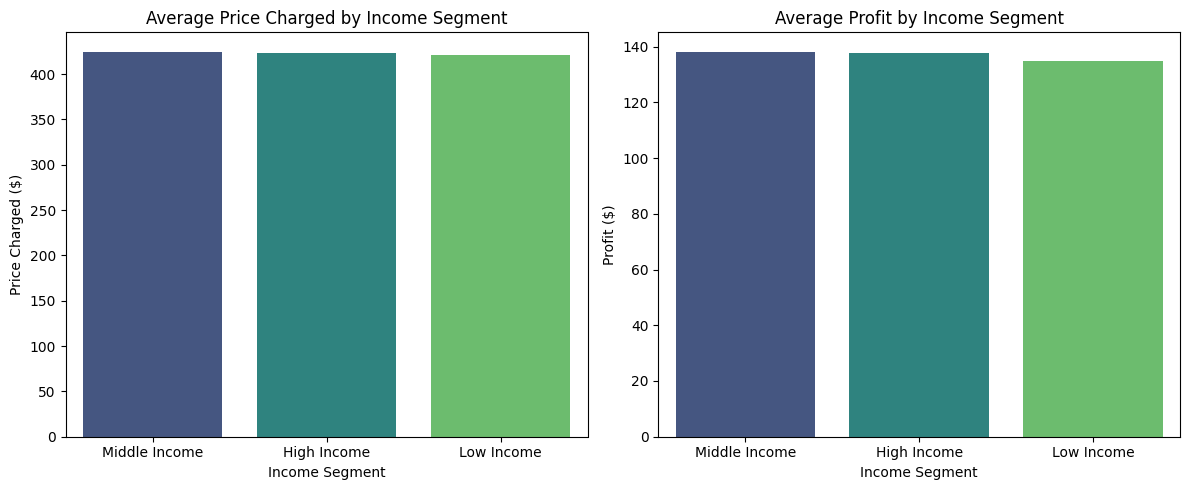

In [89]:
plt.figure(figsize=(12, 5))

# Average Price Charged
plt.subplot(1, 2, 1)
sns.barplot(data=income_spending, x='Income Segment', y='Price Charged', palette='viridis')
plt.title('Average Price Charged by Income Segment')
plt.ylabel('Price Charged ($)')
plt.xlabel('Income Segment')

# Average Profit
plt.subplot(1, 2, 2)
sns.barplot(data=income_spending, x='Income Segment', y='Profit', palette='viridis')
plt.title('Average Profit by Income Segment')
plt.ylabel('Profit ($)')
plt.xlabel('Income Segment')

plt.tight_layout()
plt.show()

Key Findings:

- **Average Price Charged:**
  - The average fare is nearly identical across all income segments (Low, Middle, High), with **no substantial increase** for high-income customers.

- **Average Profit per Ride:**
  - Profit margins are **slightly higher** for high-income and middle-income customers, but the difference is **marginal**.



#### Conclusion:

Contrary to the hypothesis, **high-income customers do not significantly spend more** per trip compared to their lower-income counterparts. This implies that cab pricing is relatively **uniform and not income-sensitive**.

---


__H4: Cities with higher user penetration tend to be more profitable on a per-ride basis__

In [95]:
city_profit = cab_df.groupby('City').agg({
    'Profit': 'mean',
    'User Penetration %': 'first'  # value is same across all rows for a city
}).reset_index()

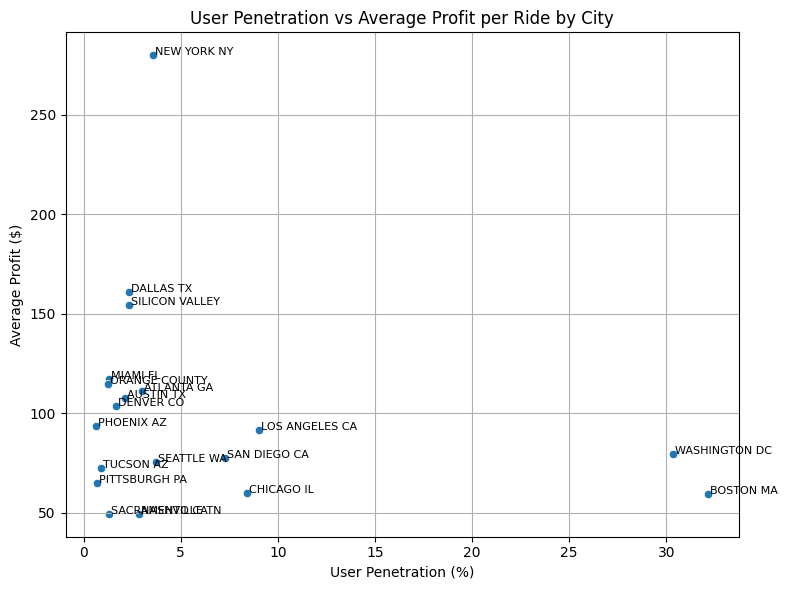

In [96]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=city_profit, x='User Penetration %', y='Profit')

for i in range(city_profit.shape[0]):
    plt.text(
        city_profit['User Penetration %'][i] + 0.1,
        city_profit['Profit'][i],
        city_profit['City'][i],
        fontsize=8
    )

plt.title('User Penetration vs Average Profit per Ride by City')
plt.xlabel('User Penetration (%)')
plt.ylabel('Average Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
correlation = city_profit['User Penetration %'].corr(city_profit['Profit'])
print(f"Correlation between User Penetration % and Profit: {correlation:.2f}")

Correlation between User Penetration % and Profit: -0.22


Key Findings:

- A **scatter plot** of `User Penetration %` vs. `Average Profit per Ride` was analyzed.
- The **correlation coefficient** was **-0.22**, indicating a **weak negative relationship**.



#### Conclusion:

This hypothesis is **not supported** by the data. In fact, there appears to be a **slight inverse trend**, where cities with higher cab service penetration actually show **lower profitability per ride** on average.

> This may suggest market saturation, competitive pricing, or operational inefficiencies in high-penetration cities like **Boston** and **Washington DC**.
---

__H5: High-value trips are more likely to be paid by card than cash.__

In [98]:
trip_payment_ct = pd.crosstab(cab_df['Trip Type'], cab_df['Payment_Mode'], normalize='index') * 100
trip_payment_ct = trip_payment_ct.round(2)
print(trip_payment_ct)

Payment_Mode   Card   Cash
Trip Type                 
High Value    59.26  40.74
Typical       59.98  40.02


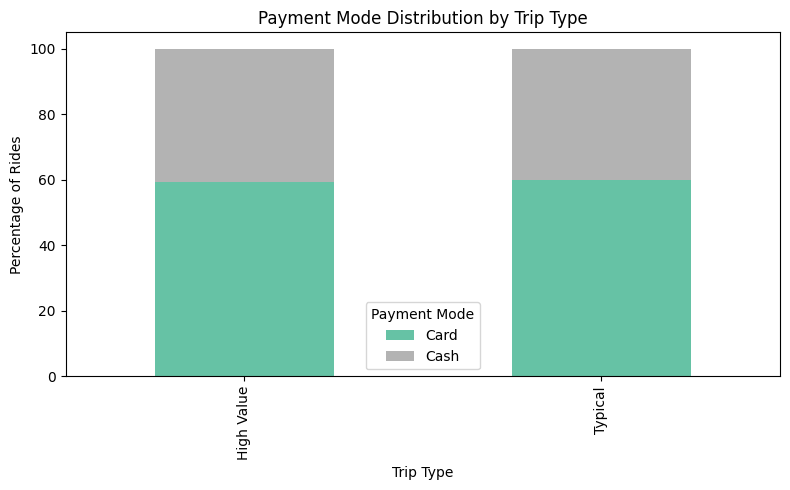

In [99]:
trip_payment_ct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

plt.title('Payment Mode Distribution by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Percentage of Rides')
plt.legend(title='Payment Mode')
plt.tight_layout()
plt.show()

 Key Findings:

- Among **high-value trips**, **59.26%** were paid by **card**, and **40.74%** by **cash**.
- For **typical trips**, the distribution is similar: **59.98%** card and **40.02%** cash.


#### Conclusion:

This hypothesis is **not strongly supported** by the data.

> While a **slight card preference** exists across both trip types, there is **no significant difference** in payment behavior between high-value and typical trips. The mode of payment appears to be **independent** of trip value.

---


__H6: High-income users are more active on weekends compared to low-income users.__

In [100]:
cab_df['Week Type'] = np.where(cab_df['Weekday'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')


In [101]:
week_income_dist = pd.crosstab(cab_df['Income Segment'], cab_df['Week Type'], normalize='index') * 100
week_income_dist = week_income_dist.round(2)
print(week_income_dist)

Week Type       Weekday  Weekend
Income Segment                  
High Income       58.85    41.15
Low Income        58.51    41.49
Middle Income     58.63    41.37


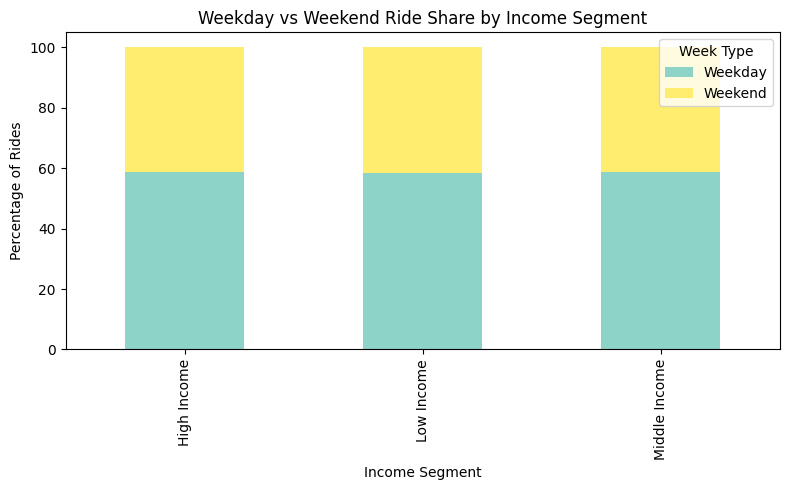

In [102]:
week_income_dist.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set3')

plt.title('Weekday vs Weekend Ride Share by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Percentage of Rides')
plt.legend(title='Week Type')
plt.tight_layout()
plt.show()


Key Findings:

| Income Segment | Weekday (%) | Weekend (%) |
|----------------|--------------|--------------|
| High Income    | 58.85%       | 41.15%       |
| Middle Income  | 58.63%       | 41.37%       |
| Low Income     | 58.51%       | 41.49%       |

- **Weekend ride share** is slightly **higher for low-income users** than high-income users.
- All groups show a similar split between weekdays and weekends, with only **marginal variation**.



##### Conclusion:

This hypothesis is **not supported**.

> Despite expectations, high-income users **do not show increased weekend activity** compared to other groups. In fact, **low-income users have the highest weekend ride percentage**, albeit by a narrow margin.

---


__H7: Profit per ride is influenced by multiple factors: distance, income level, company, and city.__

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Define features and target
features = ['KM Travelled', 'Income Segment', 'Company', 'City']
X = cab_df[features]
y = cab_df['Profit']

In [104]:
# One-hot encode categorical features
categorical_features = ['Income Segment', 'Company', 'City']
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')  # 'KM Travelled' remains untouched

# Create pipeline with Linear Regression
model = make_pipeline(preprocessor, LinearRegression())

# Fit the model
model.fit(X, y)

c:\Users\agtbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Income Segment', 'Company',
                                                   'City'])])),
                ('linearregression', LinearRegression())])

In [105]:
encoded_features = model.named_steps['columntransformer'].get_feature_names_out()
coefficients = model.named_steps['linearregression'].coef_

# Display results
coef_df = pd.DataFrame({'Feature': encoded_features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                              Feature  Coefficient
11              cat__City_NEW YORK NY   159.672099
2             cat__Company_Yellow Cab    81.972114
18           cat__City_SILICON VALLEY    57.993357
6                 cat__City_DALLAS TX    45.420246
12            cat__City_ORANGE COUNTY    15.419513
9                  cat__City_MIAMI FL    11.153777
3                 cat__City_AUSTIN TX     8.280685
21            remainder__KM Travelled     6.085683
7                 cat__City_DENVER CO     2.609352
1   cat__Income Segment_Middle Income     0.174279
0      cat__Income Segment_Low Income    -0.101644
13               cat__City_PHOENIX AZ    -2.161168
8            cat__City_LOS ANGELES CA    -6.911362
16             cat__City_SAN DIEGO CA   -11.342901
19                cat__City_TUCSON AZ   -24.187378
14            cat__City_PITTSBURGH PA   -25.127087
17               cat__City_SEATTLE WA   -28.774422
10             cat__City_NASHVILLE TN   -33.060741
15            cat__City_SACRAME



### Regression Results (Top Factors):

| Feature                                | Coefficient | Interpretation                                |
|----------------------------------------|-------------|-----------------------------------------------|
| `City_NEW YORK NY`                     | 159.67      | Strongest positive influence on profit        |
| `Company_Yellow Cab`                   | 81.97       | Yellow Cab rides yield significantly more profit than Pink Cab |
| `City_SILICON VALLEY`                 | 57.99       | High-profit city                              |
| `KM Travelled`                         | 6.09        | Each extra km adds modestly to profit         |
| `Income Segment_Middle Income`         | 0.17        | Income level has minimal impact               |
| `Income Segment_Low Income`            | -0.10       | Slight negative impact from low-income riders |
| Cities like `CHICAGO IL`, `BOSTON MA`, `WASHINGTON DC` | <-40       | Strong negative influence on profitability    |



Key Insights:

- **City** is the most dominant factor in profitability, both positively and negatively.
- **Company type** also plays a crucial role ,Yellow Cab is more profitable than Pink Cab.
- **Distance** traveled has a **positive but moderate impact**.
- **Income segment** has **negligible influence** on profit per ride.



##### Conclusion:

This hypothesis is **strongly supported**.

> Profit per ride is **multi-factorial**, with **city and company** having the greatest influence, followed by **trip distance**. Income level plays a **minor role** in profitability.

---
